In [141]:
import pandas as pd
import numpy as np

In [142]:
calls_dataset = pd.read_csv('dataset/calls.csv')
customer_dataset= pd.read_csv('dataset/customers.csv')
reason_dataset= pd.read_csv('dataset/reason.csv')
sentiment_dataset= pd.read_csv('dataset/sentiment_statistics.csv')

In [143]:
call_reason_dataset= pd.merge(calls_dataset,reason_dataset, on=('call_id') ,how=('left'))
call_reason_dataset

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Booking
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,IRROPS
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,Upgrade
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Seating
...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,Post Flight
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,Upgrade
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,Upgrade
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...,NaN


In [144]:
call_sentiment_dataset= pd.merge(sentiment_dataset, call_reason_dataset, on=('call_id'), how=('left'))
call_sentiment_dataset.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason
0,4667960400,963118,neutral,angry,-0.04,0.39,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel
1,1122072124,519057,calm,neutral,0.02,0.35,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Booking
2,6834291559,158319,neutral,polite,-0.13,0.32,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,IRROPS
3,2266439882,488324,neutral,frustrated,-0.20,0.20,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,Upgrade
4,1211603231,721730,neutral,polite,-0.05,0.35,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Seating


In [145]:
main_dataset= pd.merge(call_sentiment_dataset, customer_dataset, on=('customer_id'), how=('left'))
main_dataset.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,customer_name,elite_level_code
0,4667960400,963118,neutral,angry,-0.04,0.39,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,Matthew Foster,4.0
1,1122072124,519057,calm,neutral,0.02,0.35,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Booking,Tammy Walters,NaN
2,6834291559,158319,neutral,polite,-0.13,0.32,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,IRROPS,Jeffery Dixon,NaN
3,2266439882,488324,neutral,frustrated,-0.20,0.20,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,Upgrade,David Wilkins,2.0
4,1211603231,721730,neutral,polite,-0.05,0.35,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Seating,Elizabeth Daniels,0.0


In [146]:
main_dataset.isnull().sum()

call_id                        0
agent_id_x                     0
agent_tone                   217
customer_tone                  0
average_sentiment            109
silence_percent_average        0
customer_id                    0
agent_id_y                     0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
primary_call_reason         5157
customer_name                  0
elite_level_code           25767
dtype: int64

In [147]:
main_dataset['elite_level_code'].fillna(0, inplace=True)
main_dataset['agent_tone'].fillna('neutral', inplace=True)
main_dataset['average_sentiment'].fillna(main_dataset['average_sentiment'].mean(), inplace=True)
main_dataset.isnull().sum()

call_id                       0
agent_id_x                    0
agent_tone                    0
customer_tone                 0
average_sentiment             0
silence_percent_average       0
customer_id                   0
agent_id_y                    0
call_start_datetime           0
agent_assigned_datetime       0
call_end_datetime             0
call_transcript               0
primary_call_reason        5157
customer_name                 0
elite_level_code              0
dtype: int64

In [148]:
main_dataset['call_start_datetime']= pd.to_datetime(main_dataset['call_start_datetime'])
main_dataset['call_end_datetime']= pd.to_datetime(main_dataset['call_end_datetime'])
main_dataset['agent_assigned_datetime']= pd.to_datetime(main_dataset['agent_assigned_datetime'])

In [149]:
main_dataset['handle_time']= (main_dataset['call_end_datetime']- main_dataset['agent_assigned_datetime']).dt.total_seconds()
main_dataset['allocation_time']= (main_dataset['agent_assigned_datetime']- main_dataset['call_start_datetime']).dt.total_seconds()
main_dataset.drop('call_transcript', axis=1, inplace=True)
main_dataset.drop('agent_id_y', axis=1, inplace=True)

In [150]:
aht = main_dataset['handle_time'].mean()
ast = main_dataset['allocation_time'].mean()
print(f"Average Handle Time (AHT): {aht//60} min")
print(f"Average Speed to Answer (AST): {ast//60} min")

Average Handle Time (AHT): 11.0 min
Average Speed to Answer (AST): 7.0 min


In [151]:
import re
main_dataset['primary_call_reason'].fillna('Unknown Reason', inplace=True)
main_dataset.isnull().sum() # preprocessing completed
main_dataset['primary_call_reason'].value_counts()
def clean_reason(reason):
    reason = re.sub(r'\s+', ' ', reason)  # Replace multiple spaces with a single space
    reason = reason.strip()  # Remove leading and trailing spaces
    return reason.lower() 

main_dataset['primary_call_reason'] = main_dataset['primary_call_reason'].apply(clean_reason)

# Check for unique call reasons after cleaning
unique_reasons = main_dataset['primary_call_reason'].unique()
print(unique_reasons)

# Get value counts of cleaned call reasons
reason_counts = main_dataset['primary_call_reason'].value_counts()
print(reason_counts)

# Check for any remaining null values
print(main_dataset.isnull().sum())

# def remove_spaces(reason):
#     reason = re.sub(r'\s+', ' ', reason)
#     reason = reason.strip()  # Remove leading/trailing spaces
#     return reason.lower() 
    # words= reason.split()
    # final_value= ""

    # for i in words:
    #     i.strip()
    #     if(final_value!= ""):
    #         if(i!= " "):
    #             final_value = final_value + " " + i
    #     else:
    #         final_value= i

# main_dataset['primary_call_reason'].apply(remove_spaces)
(main_dataset['primary_call_reason'].unique())

['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' 'unknown reason' 'voluntary change' 'post flight' 'check in'
 'other topics' 'communications' 'schedule change' 'products & services'
 'digital support' 'disability' 'unaccompanied minor' 'baggage'
 'traveler updates' 'etc' 'post-flight' 'check-in' 'products and services']
irrops                   13311
voluntary change         10848
seating                   6365
mileage plus              5851
unknown reason            5157
post-flight               3957
communications            3840
products and services     2856
baggage                   2832
upgrade                   2738
booking                   2637
checkout                  1888
voluntary cancel          1607
check-in                  1519
digital support           1225
etc                        952
traveler updates           937
other topics               818
schedule change            731
products & services        476
disability          

array(['voluntary cancel', 'booking', 'irrops', 'upgrade', 'seating',
       'mileage plus', 'checkout', 'unknown reason', 'voluntary change',
       'post flight', 'check in', 'other topics', 'communications',
       'schedule change', 'products & services', 'digital support',
       'disability', 'unaccompanied minor', 'baggage', 'traveler updates',
       'etc', 'post-flight', 'check-in', 'products and services'],
      dtype=object)

[394.39588689 626.49969605 617.06840391 748.11727749 220.        ]


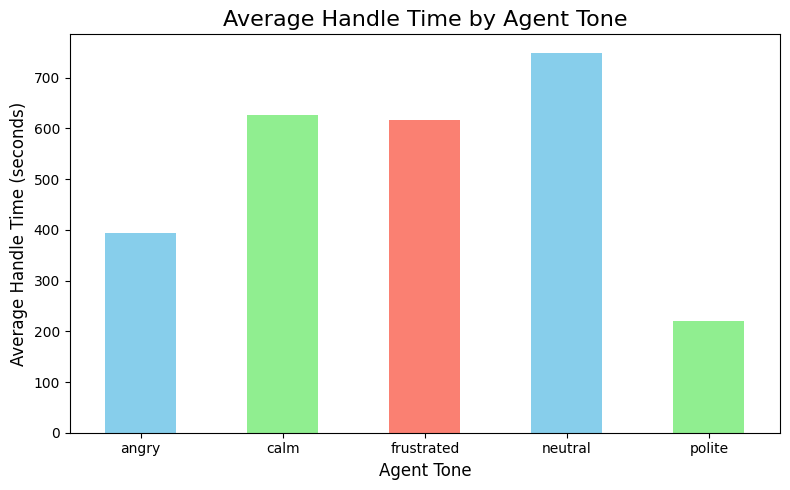

In [152]:
import matplotlib.pyplot as plt
avg_handle_time_by_agent_tone = main_dataset.groupby('agent_tone')['handle_time'].mean()
print(avg_handle_time_by_agent_tone.values)
plt.figure(figsize=(8, 5))
avg_handle_time_by_agent_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Handle Time by Agent Tone', fontsize=16)
plt.xlabel('Agent Tone', fontsize=12)
plt.ylabel('Average Handle Time (seconds)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

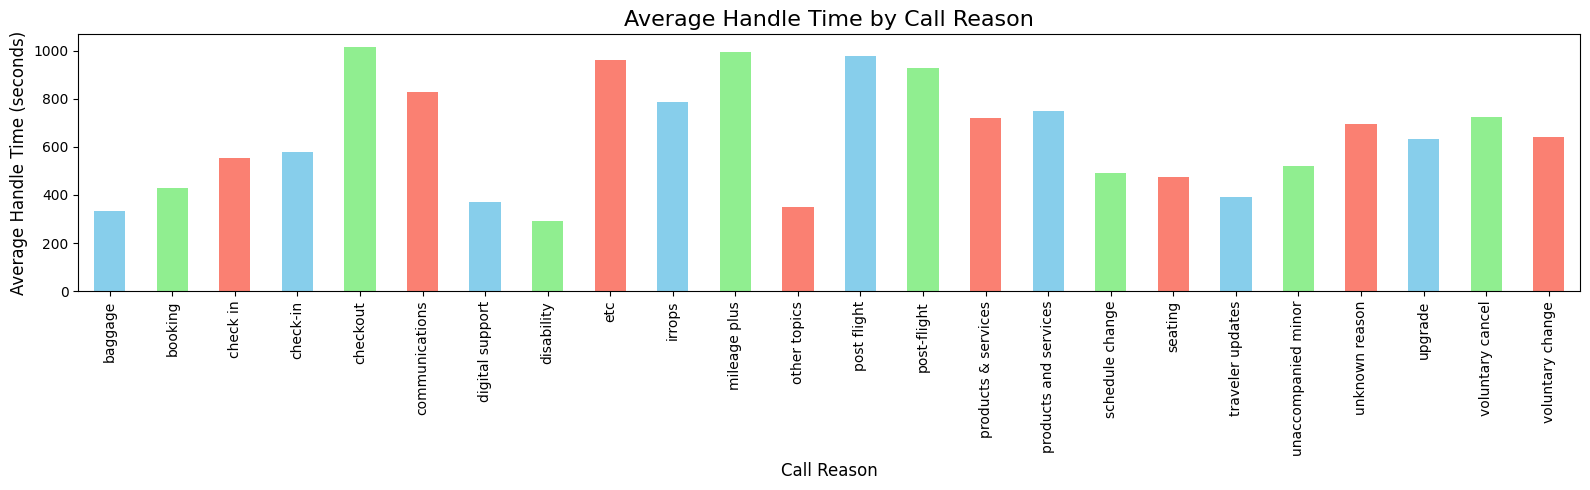

In [153]:
avg_handle_time_by_reason= main_dataset.groupby('primary_call_reason')['handle_time'].mean()
plt.figure(figsize=(16, 5))
avg_handle_time_by_reason.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Handle Time by Call Reason', fontsize=16)
plt.xlabel('Call Reason', fontsize=12)
plt.ylabel('Average Handle Time (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

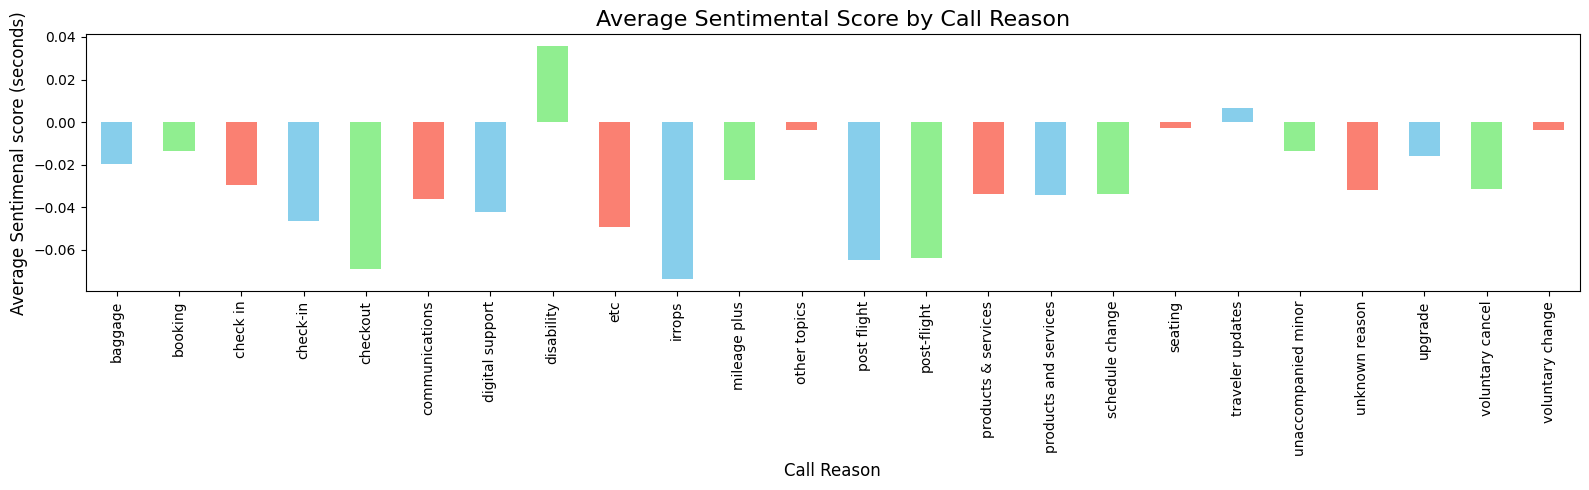

In [154]:
avg_sentimental_score_by_reason= main_dataset.groupby('primary_call_reason')['average_sentiment'].mean()
plt.figure(figsize=(16, 5))
avg_sentimental_score_by_reason.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Sentimental Score by Call Reason', fontsize=16)
plt.xlabel('Call Reason', fontsize=12)
plt.ylabel('Average Sentimenal score (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

    hour  handle_time
0      0   682.545772
1      1   757.087034
2      2   703.973384
3      3   706.529467
4      4   688.331762
5      5   691.630435
6      6   698.277778
7      7   698.502475
8      8   703.986916
9      9   712.512686
10    10   692.383151
11    11   683.592677
12    12   691.796610
13    13   700.890093
14    14   690.381209
15    15   695.198765
16    16   687.263339
17    17   695.834768
18    18   719.538757
19    19   682.594595
20    20   658.946444
21    21   685.877034
22    22   717.600000
23    23   672.707775


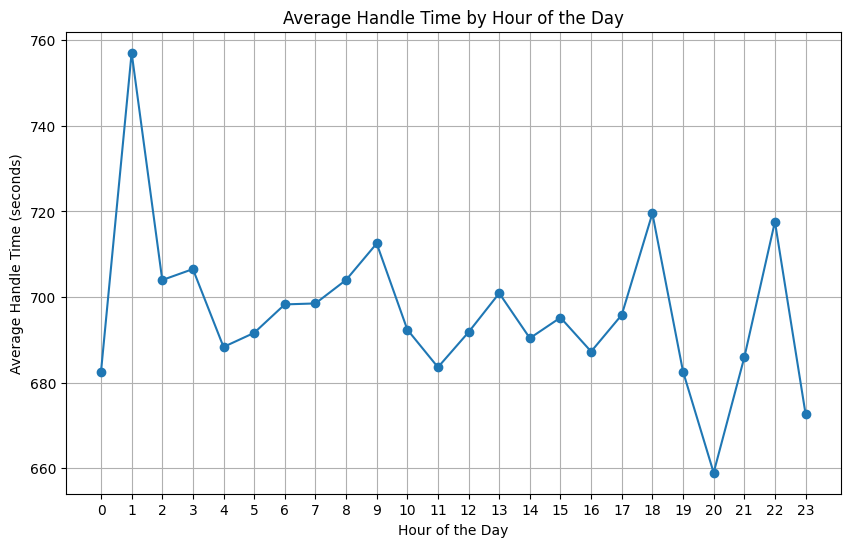

In [155]:
main_dataset['hour'] = main_dataset['call_start_datetime'].dt.hour

# Calculate average handle time per hour
avg_handle_time_per_hour = main_dataset.groupby('hour')['handle_time'].mean().reset_index()
print(avg_handle_time_per_hour)
plt.figure(figsize=(10, 6))
plt.plot(avg_handle_time_per_hour['hour'], avg_handle_time_per_hour['handle_time'], marker='o')
plt.title('Average Handle Time by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Handle Time (seconds)')
plt.xticks(avg_handle_time_per_hour['hour'])  # Set x-ticks to be the hours
plt.grid()
plt.show()

In [156]:
average_sentiment_by_agent_tone= main_dataset.groupby('agent_tone')['average_sentiment'].mean()

In [157]:
average_sentiment_by_hour= main_dataset.groupby('hour')['average_sentiment'].mean().reset_index()
average_sentiment_by_hour
# average_sentiment_by_hour.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
# plt.title('Average Sentimental Score by Hour of the Day', fontsize=16)
# plt.xlabel('Hour of the day', fontsize=12)
# plt.ylabel('Average Sentimenal score', fontsize=12)
# plt.xticks(rotation=90)
# plt.tight_layout()
# plt.show()

,hour,average_sentiment
0,0,-0.036295
1,1,-0.028292
2,2,-0.032684
3,3,-0.025788
4,4,-0.038515
5,5,-0.031272
6,6,-0.031275
7,7,-0.035097
8,8,-0.030506
9,9,-0.034789


customer_tone
angry         695.530261
calm          699.604098
frustrated    692.738764
neutral       707.625312
polite        689.659731
Name: handle_time, dtype: float64


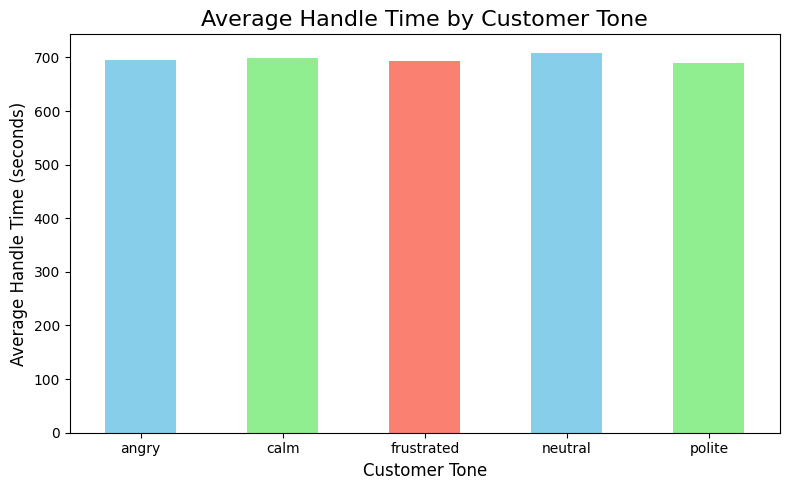

In [158]:
avg_handle_time_by_customer_tone = main_dataset.groupby('customer_tone')['handle_time'].mean()
print(avg_handle_time_by_customer_tone)
plt.figure(figsize=(8, 5))
avg_handle_time_by_customer_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Handle Time by Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=12)
plt.ylabel('Average Handle Time (seconds)', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

customer_tone
angry         695.530261
calm          699.604098
frustrated    692.738764
neutral       707.625312
polite        689.659731
Name: handle_time, dtype: float64


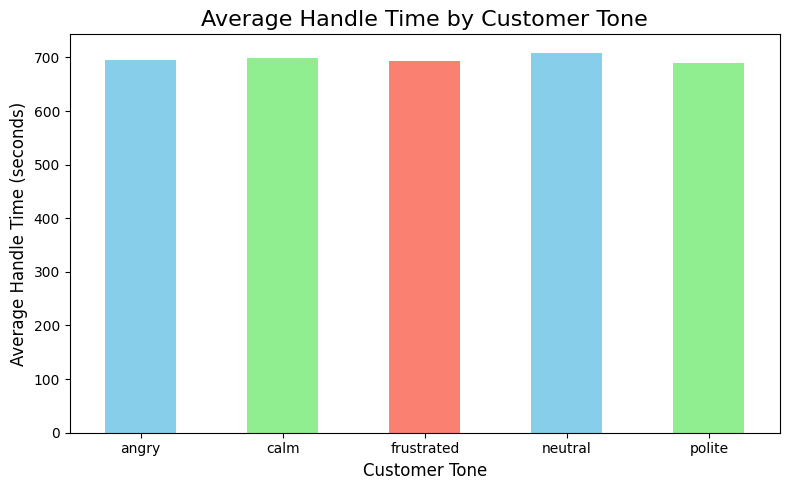

In [159]:
avg_handle_time_by_customer_tone = main_dataset.groupby('customer_tone')['handle_time'].mean()
print(avg_handle_time_by_customer_tone)
plt.figure(figsize=(8, 5))
avg_handle_time_by_customer_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Handle Time by Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=12)
plt.ylabel('Average Handle Time (seconds)', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [160]:
print(main_dataset['average_sentiment'].max())
print(main_dataset['average_sentiment'].min())

2.67
-1.38


elite_level_code
0.0    678.143149
1.0    688.371608
2.0    726.449925
3.0    727.510460
4.0    788.244706
5.0    896.950608
Name: handle_time, dtype: float64


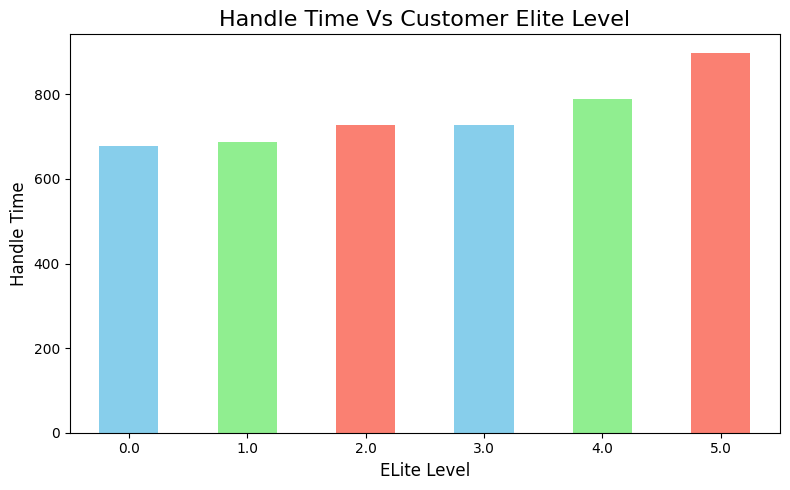

In [161]:
avg_handle_time_by_elite_level= main_dataset.groupby('elite_level_code')['handle_time'].mean()
print(avg_handle_time_by_elite_level)
plt.figure(figsize=(8, 5))
avg_handle_time_by_elite_level.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Handle Time Vs Customer Elite Level', fontsize=16)
plt.xlabel('ELite Level', fontsize=12)
plt.ylabel('Handle Time', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

customer_tone
angry         0.871321
calm          0.868335
frustrated    0.877739
neutral       0.890820
polite        0.886577
Name: elite_level_code, dtype: float64


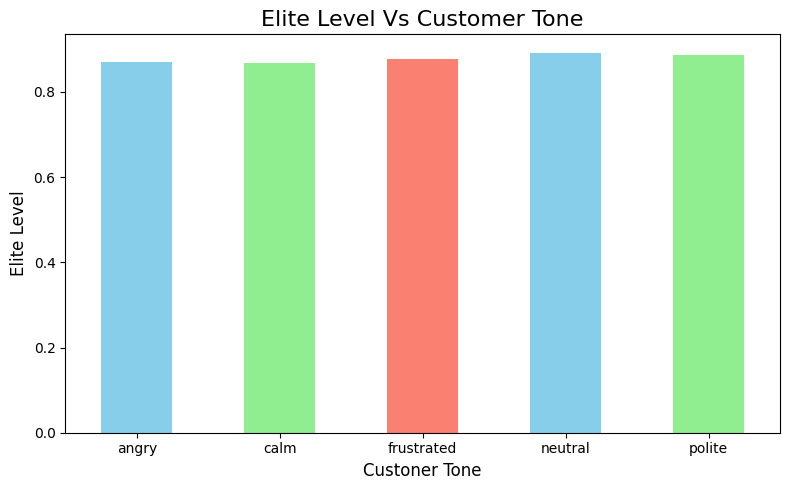

In [162]:
avg_elite_level_by_customer_tone= main_dataset.groupby('customer_tone')['elite_level_code'].mean()
print(avg_elite_level_by_customer_tone)
plt.figure(figsize=(8, 5))
avg_elite_level_by_customer_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Elite Level Vs Customer Tone', fontsize=16)
plt.xlabel('Custoner Tone', fontsize=12)
plt.ylabel('Elite Level', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

agent_tone
angry         0.912596
calm          0.879595
frustrated    0.812975
neutral       0.884444
polite        0.643678
Name: elite_level_code, dtype: float64


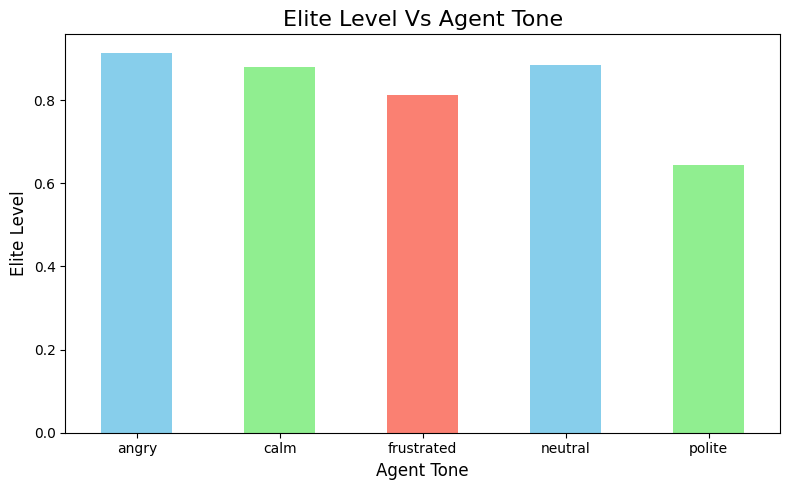

In [163]:
avg_elite_level_by_agent_tone= main_dataset.groupby('agent_tone')['elite_level_code'].mean()
print(avg_elite_level_by_agent_tone)
plt.figure(figsize=(8, 5))
avg_elite_level_by_agent_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Elite Level Vs Agent Tone', fontsize=16)
plt.xlabel('Agent Tone', fontsize=12)
plt.ylabel('Elite Level', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

customer_tone
angry         0.18
calm          0.15
frustrated    0.10
neutral       0.10
polite        0.16
Name: silence_percent_average, dtype: float64


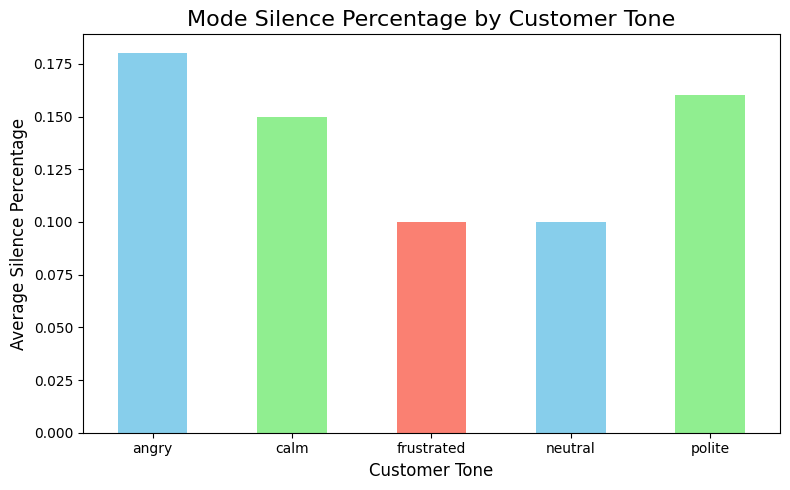

In [164]:
avg_handle_time_by_customer_tone_mode = main_dataset.groupby('customer_tone')['silence_percent_average'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
print(avg_handle_time_by_customer_tone_mode)
plt.figure(figsize=(8, 5))
avg_handle_time_by_customer_tone_mode.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Mode Silence Percentage by Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=12)
plt.ylabel('Average Silence Percentage', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

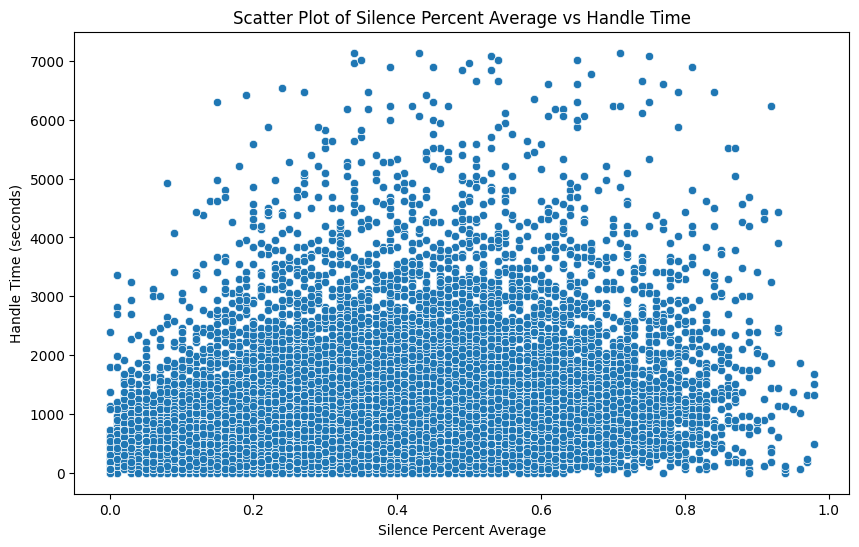

In [165]:
import seaborn as sns

# Assuming you have a DataFrame `main_dataset` with columns 'silence_percent_average' and 'handle_time'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=main_dataset, x='silence_percent_average', y='handle_time')
plt.title('Scatter Plot of Silence Percent Average vs Handle Time')
plt.xlabel('Silence Percent Average')
plt.ylabel('Handle Time (seconds)')
plt.show()

customer_tone
angry         0.286450
calm          0.284908
frustrated    0.283494
neutral       0.288883
polite        0.283799
Name: silence_percent_average, dtype: float64


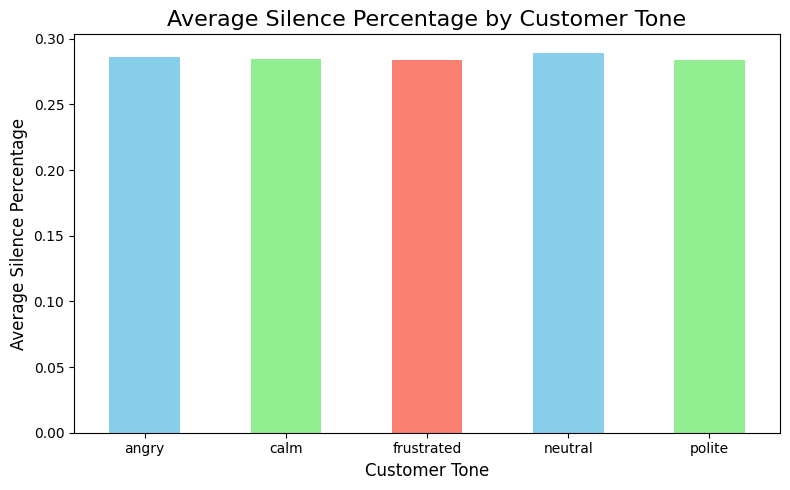

In [166]:
silence_average_by_customer_tone = main_dataset.groupby('customer_tone')['silence_percent_average'].mean()
print(silence_average_by_customer_tone)
plt.figure(figsize=(8, 5))
silence_average_by_customer_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Silence Percentage by Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=12)
plt.ylabel('Average Silence Percentage', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

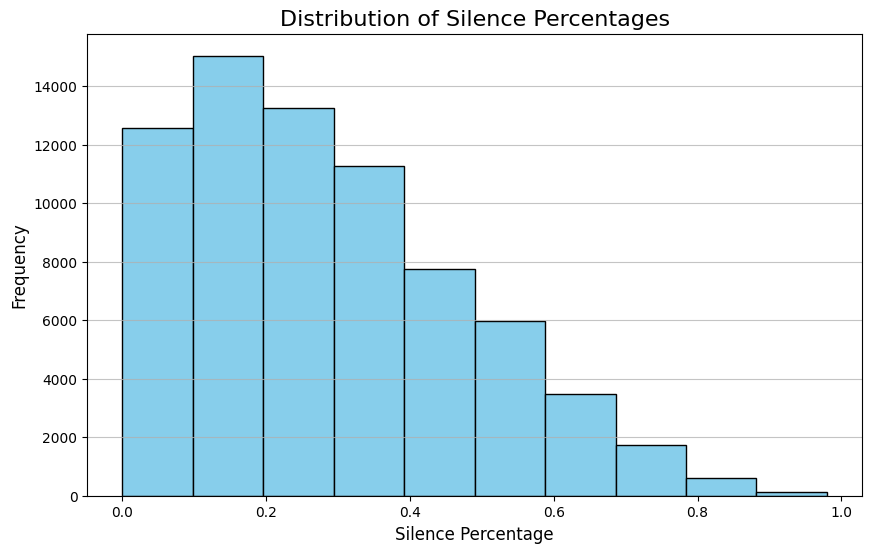

In [167]:
plt.figure(figsize=(10, 6))
plt.hist(main_dataset['silence_percent_average'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Silence Percentages', fontsize=16)
plt.xlabel('Silence Percentage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

agent_tone
angry         0.190077
calm          0.291409
frustrated    0.251336
neutral       0.285983
polite        0.256552
Name: silence_percent_average, dtype: float64


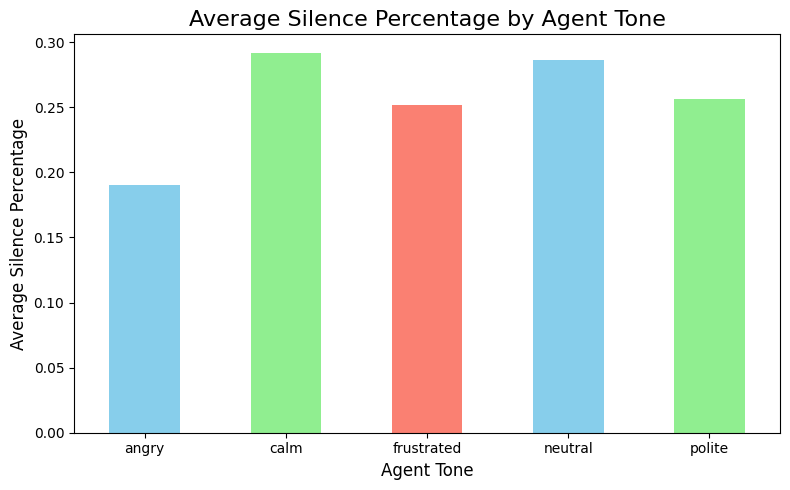

In [168]:
silence_average_by_agent_tone = main_dataset.groupby('agent_tone')['silence_percent_average'].mean()
print(silence_average_by_agent_tone)
plt.figure(figsize=(8, 5))
silence_average_by_agent_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Silence Percentage by Agent Tone', fontsize=16)
plt.xlabel('Agent Tone', fontsize=12)
plt.ylabel('Average Silence Percentage', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

primary_call_reason
baggage                  0.250508
booking                  0.260948
check in                 0.264857
check-in                 0.262199
checkout                 0.292309
communications           0.303578
digital support          0.285298
disability               0.248635
etc                      0.287563
irrops                   0.309404
mileage plus             0.275038
other topics             0.272726
post flight              0.296810
post-flight              0.297897
products & services      0.274622
products and services    0.277115
schedule change          0.267223
seating                  0.264613
traveler updates         0.284717
unaccompanied minor      0.242500
unknown reason           0.286411
upgrade                  0.277023
voluntary cancel         0.281767
voluntary change         0.289599
Name: silence_percent_average, dtype: float64


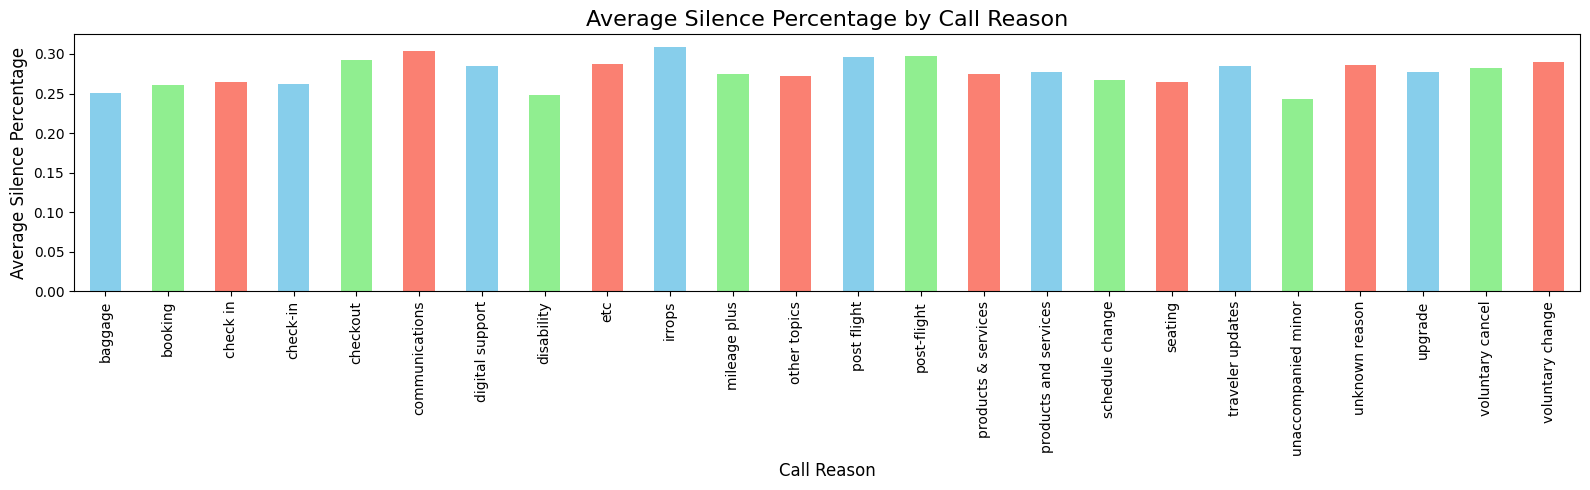

In [169]:
silence_average_by_call_reason = main_dataset.groupby('primary_call_reason')['silence_percent_average'].mean()
print(silence_average_by_call_reason)
plt.figure(figsize=(16, 5))
silence_average_by_call_reason.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Silence Percentage by Call Reason', fontsize=16)
plt.xlabel('Call Reason', fontsize=12)
plt.ylabel('Average Silence Percentage', fontsize=12)    
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [170]:
# Create a time index for every second an agent is on a call
time_ranges = []

for index, row in main_dataset.iterrows():
    time_range = pd.date_range(start=row['agent_assigned_datetime'], end=row['call_end_datetime'], freq='S')
    time_ranges.append(time_range)

# Concatenate all time ranges into one long Series
all_times = pd.concat([pd.Series(times) for times in time_ranges])

# Count how many agents are active at each second
active_agents_per_second = all_times.value_counts()

# Calculate the average number of agents on call per second
average_agents = active_agents_per_second.mean()

print(f"Average number of agents on call at any given second: {average_agents}")

Average number of agents on call at any given second: 18.836792096545995


In [171]:
tone_score_mapping = {
    'angry': 1,
    'frustrated': 2,
    'neutral': 3,
    'calm': 4,
    'polite': 5
}

main_dataset['agent_tone_score']= main_dataset['agent_tone'].map(tone_score_mapping)
main_dataset['customer_tone_score'] = main_dataset['customer_tone'].map(tone_score_mapping)

In [172]:
total_calls_per_agent = main_dataset.groupby('agent_id_x').agg(
    total_calls=('call_id', 'size'),
    avg_tone_rating=('agent_tone_score', 'mean')
).reset_index()
total_calls_per_agent

,agent_id_x,total_calls,avg_tone_rating
0,102574,2,3.500000
1,103651,298,3.278523
2,106000,113,3.292035
3,107876,6,3.166667
4,112609,11,3.454545
...,...,...,...
378,981776,309,3.288026
379,981779,227,3.246696
380,982131,270,3.240741
381,992521,46,3.195652


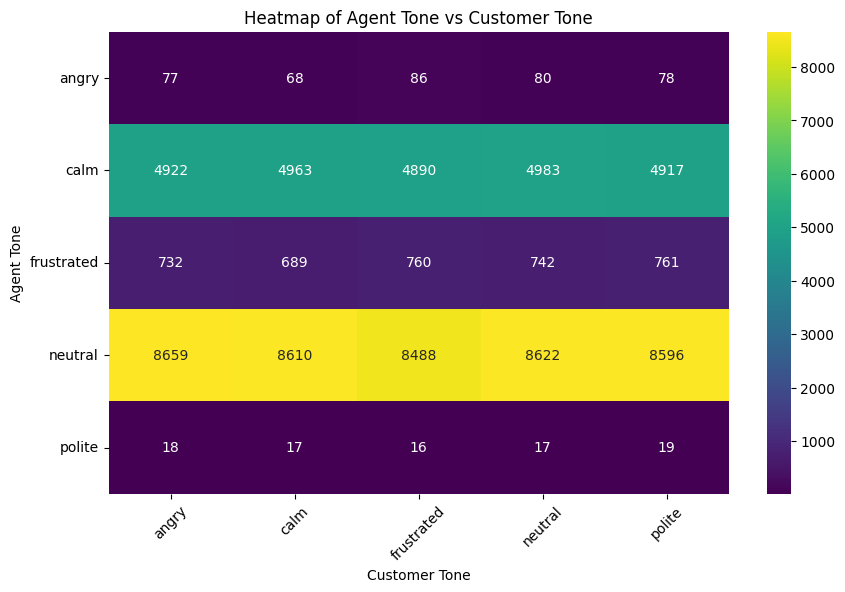

In [173]:
contingency_table = pd.crosstab(main_dataset['agent_tone'], main_dataset['customer_tone'])
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of Agent Tone vs Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Agent Tone')
plt.xticks(rotation=45) 
plt.yticks(rotation=0)   
plt.show()

In [174]:
agent_tone=main_dataset.groupby('agent_tone').size()
customer_tone= main_dataset.groupby('customer_tone').size()
print(agent_tone)
print("--------------------")
print(customer_tone)

agent_tone
angry           389
calm          24675
frustrated     3684
neutral       42975
polite           87
dtype: int64
--------------------
customer_tone
angry         14408
calm          14347
frustrated    14240
neutral       14444
polite        14371
dtype: int64


In [177]:
agent_stats = main_dataset.groupby('agent_id_x').agg(
    avg_handle_time=('handle_time', 'mean'),  # Average handling time
    avg_silence_percentage=('silence_percent_average', 'mean'),  # Average silence percentage
    avg_call_sentiment_score= ('average_sentiment','mean')
).reset_index()
agent_data=pd.merge(total_calls_per_agent,agent_stats,on='agent_id_x')
agent_data

,agent_id_x,total_calls,avg_tone_rating,avg_handle_time,avg_silence_percentage,avg_call_sentiment_score
0,102574,2,3.500000,3600.000000,0.260000,-0.075000
1,103651,298,3.278523,747.382550,0.293389,-0.027953
2,106000,113,3.292035,689.203540,0.274956,-0.032124
3,107876,6,3.166667,990.000000,0.405000,-0.065000
4,112609,11,3.454545,850.909091,0.286364,-0.020909
...,...,...,...,...,...,...
378,981776,309,3.288026,703.106796,0.284725,-0.026861
379,981779,227,3.246696,683.788546,0.301057,-0.034714
380,982131,270,3.240741,722.222222,0.276630,-0.038815
381,992521,46,3.195652,949.565217,0.293043,-0.016957


In [178]:
import pickle
pickle.dump(main_dataset,open('dataset/main_dataset.pkl','wb'))
pickle.dump(agent_data,open('dataset/agent_data.pkl','wb'))
